<a href="https://colab.research.google.com/github/bahgat-ahmed/Natural-Language-Processing-in-TensorFlow/blob/main/Course_3_Week_3_Lesson_1_Single_Layer_%26_Multiple_Layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Single Layer LSTM

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete72343C/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete72343C/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete72343C/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [5]:
tokenizer = info.features['text'].encoder

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    # If I wrap that with tf.keras.layers.Bidirectional, it will make my cell state go in both directions
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

You'll see this when you explore the model summary, which looks like this. We have our embedding and our bidirectional containing the LSTM, followed by the two dense layers. If you notice the output from the bidirectional is now a 128, even though we told our LSTM that we wanted 64, the bidirectional doubles this up to a 128.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 60s 154ms/step - loss: 0.5950 - accuracy: 0.6721 - val_loss: 0.5038 - val_accuracy: 0.7892
Epoch 2/10
391/391 [==============================] - 60s 153ms/step - loss: 0.3703 - accuracy: 0.8472 - val_loss: 0.4125 - val_accuracy: 0.8172
Epoch 3/10
391/391 [==============================] - 60s 154ms/step - loss: 0.6699 - accuracy: 0.6162 - val_loss: 0.8447 - val_accuracy: 0.5070
Epoch 4/10
391/391 [==============================] - 60s 154ms/step - loss: 0.5536 - accuracy: 0.7324 - val_loss: 0.6336 - val_accuracy: 0.6279
Epoch 5/10
391/391 [==============================] - 59s 152ms/step - loss: 0.5194 - accuracy: 0.7416 - val_loss: 0.6386 - val_accuracy: 0.6578
Epoch 6/10
391/391 [==============================] - 60s 153ms/step - loss: 0.4112 - accuracy: 0.8203 - val_loss: 0.4749 - val_accuracy: 0.7908
Epoch 7/10
391/391 [==============================] - 61s 155ms/step - loss: 0.3089 - accuracy: 0.8770 - val_loss: 0.4298 - val_ac

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

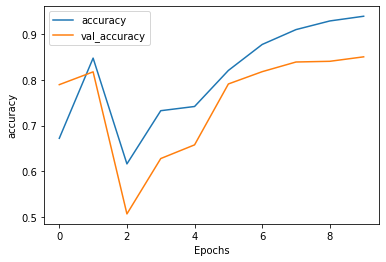

In [12]:
plot_graphs(history, 'accuracy')

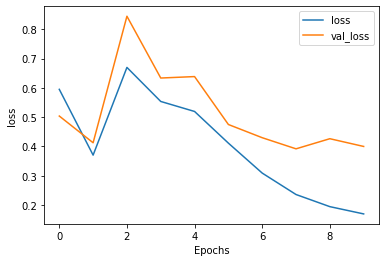

In [13]:
plot_graphs(history, 'loss')

The instructor found from training networks that jaggedness can be an indication that your model needs improvement, and the single LSTM that you can see here is not the smoothest.

So, let's look for another one where we use two LSTM layers instead of just one LSTM layer.

You can also stack LSTMs like any other keras layer by using code like this. But when you feed an LSTM into another one, you do have to put the `return_sequences=True` parameter into the first one. This ensures that the outputs of the LSTM match the desired inputs of the next one.

In [14]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [16]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
NUM_EPOCHS = 10
history = model2.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 108s 275ms/step - loss: 0.5985 - accuracy: 0.6754 - val_loss: 0.4544 - val_accuracy: 0.7999
Epoch 2/10
391/391 [==============================] - 107s 272ms/step - loss: 0.3958 - accuracy: 0.8296 - val_loss: 0.4578 - val_accuracy: 0.7877
Epoch 3/10
391/391 [==============================] - 106s 272ms/step - loss: 0.3092 - accuracy: 0.8760 - val_loss: 0.4203 - val_accuracy: 0.8292
Epoch 4/10
391/391 [==============================] - 108s 275ms/step - loss: 0.2690 - accuracy: 0.8976 - val_loss: 0.4296 - val_accuracy: 0.8240
Epoch 5/10
391/391 [==============================] - 107s 272ms/step - loss: 0.2055 - accuracy: 0.9242 - val_loss: 0.4619 - val_accuracy: 0.8350
Epoch 6/10
391/391 [==============================] - 108s 276ms/step - loss: 0.1591 - accuracy: 0.9441 - val_loss: 0.5204 - val_accuracy: 0.8224
Epoch 7/10
391/391 [==============================] - 107s 274ms/step - loss: 0.1214 - accuracy: 0.9596 - val_loss: 0.6027 -

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

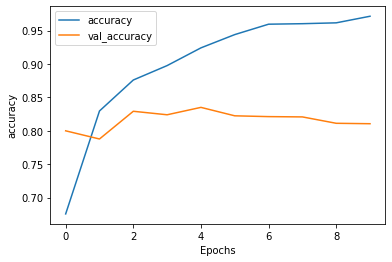

In [19]:
plot_graphs(history, 'accuracy')

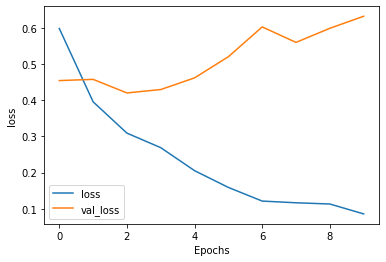

In [20]:
plot_graphs(history, 'loss')